In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
df=pd.read_csv("global_heat_index.csv")

In [84]:
df.head(10)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [86]:
df.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


In [87]:
clean1= df[df['Hour']<6]
clean2= df[df['Hour']>18]

In [88]:
clean1.head(10)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
24,2011,1,2,0,3,10.231350,984.838196,61.345492,79.954536,2.360912,0
25,2011,1,2,1,3,9.653407,984.457092,63.566375,87.481873,2.193934,0
26,2011,1,2,2,3,9.165823,984.032227,66.509376,90.634872,1.904846,0
27,2011,1,2,3,3,8.773836,984.161560,69.923065,90.924843,1.597840,0


In [89]:
clean2.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971374,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0


In [90]:
df=df.drop(clean1.index,axis=0)

In [91]:
df=df.drop(clean2.index , axis=0)

In [92]:
x=df.iloc[:,0:10]

In [93]:
y=df.iloc[:,:-1]

In [94]:
x.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695


In [95]:
x.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9490 entries, 6 to 17514
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9490 non-null   int64  
 1   Month              9490 non-null   int64  
 2   Day                9490 non-null   int64  
 3   Hour               9490 non-null   int64  
 4   Dew Point          9490 non-null   int64  
 5   Temperature        9490 non-null   float64
 6   Pressure           9490 non-null   float64
 7   Relative Humidity  9490 non-null   float64
 8   Wind Direction     9490 non-null   float64
 9   Wind Speed         9490 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 815.5 KB


In [96]:
x.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
count,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000
mean,2011.500000,6.526027,15.720548,12.000000,11.172603,29.843403,979.837013,41.346867,192.621930,2.404642
std,0.500026,3.448033,8.796710,3.741855,11.204963,8.272602,6.183468,25.653292,98.401266,1.241931
min,2011.000000,1.000000,1.000000,6.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113
25%,2011.000000,4.000000,8.000000,9.000000,2.000000,24.991642,974.409988,18.638580,98.280884,1.488960
50%,2011.500000,7.000000,16.000000,12.000000,11.000000,30.117739,980.606934,39.359365,230.102280,2.246798
75%,2012.000000,10.000000,23.000000,15.000000,22.000000,34.920360,985.049332,61.814032,258.325935,3.153406
max,2012.000000,12.000000,31.000000,18.000000,27.000000,52.157927,993.353210,100.000000,359.821167,7.287084


In [97]:
corr_matrix=df.corr()

In [98]:
features=corr_matrix.index

In [99]:
features

Index(['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Wind Direction', 'Wind Speed',
       'Solar Radiation (GHI)'],
      dtype='object')

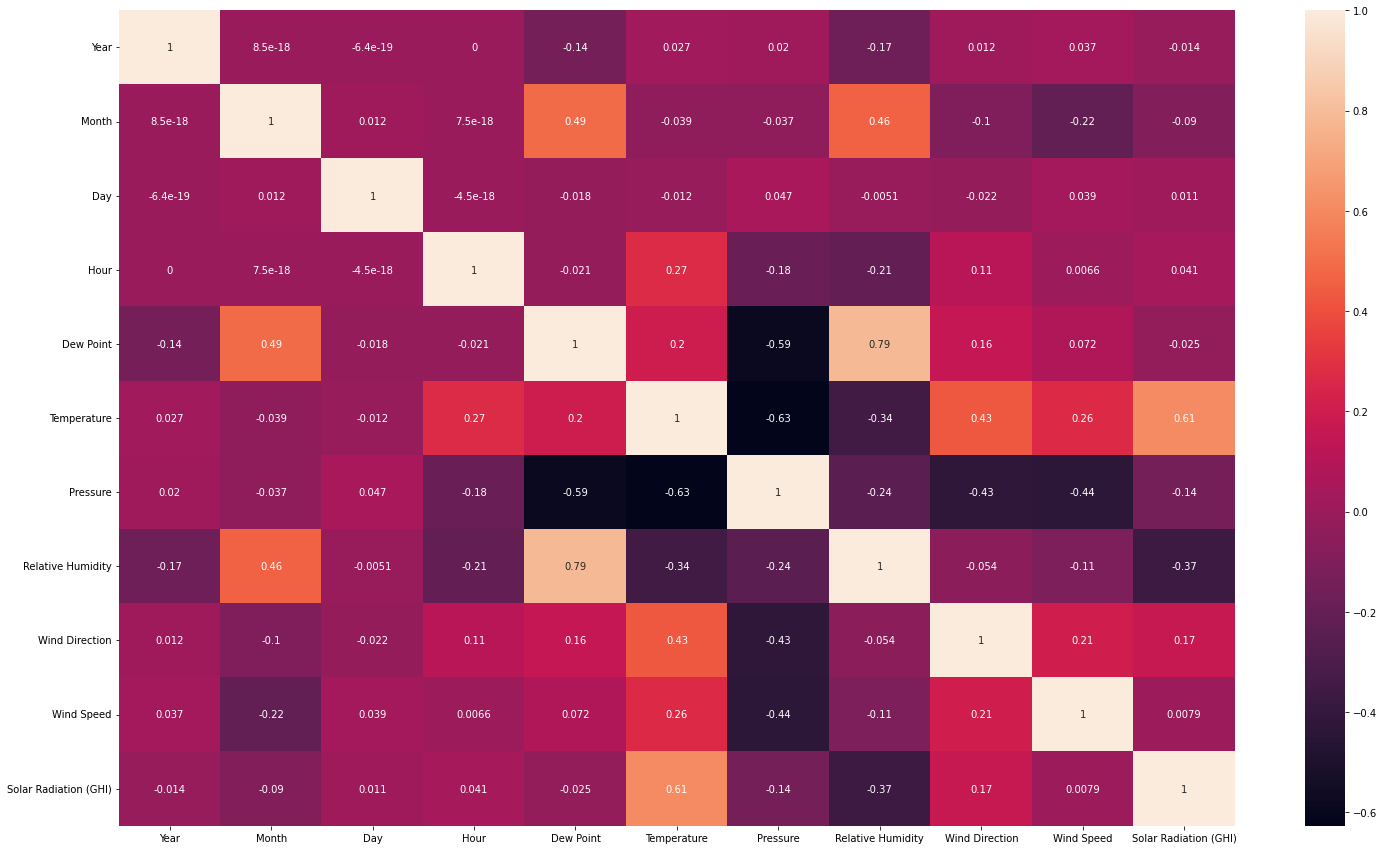

In [105]:
plt.figure(figsize=(25,15))
sns.heatmap(df[features].corr(),annot=True)